In [ ]:
import pandas as pd
import nltk
import ast
nltk.download('stopwords') 
import numpy as np
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df = pd.read_csv('Juarez_words_full_qtd_all.csv')
df_words = df
df_words['Palavras'] = df_words['Palavras'].apply(ast.literal_eval)

In [ ]:
'''stop_words = stopwords.words('portuguese')
stop_words_manual = ['to','pt','sobre','ca','si','al','ra','ainda','ai','so','ta','ae','fl','in','oa','fi','at','co','li','ti','qualquer','ha','dr','sa','ter','be','tal','ar','sob','onde','es','ma','of','ri','re','ir','assim','la','sempre','desde','cl','jl','is','mo','am','ac','it','oe','an','st','ro','or','en','vez','on','pa','io','dc','lo','deste','alguns','fa','pe','mi','lu','mm','va','pis','ua','af','agora','ce','le','il','he','vossa','via','pi','ne','des','ali','pr','om','quais','nesse','alguma','el','cr','az','aj','aue','ei','au','demais','nessa','av','qua','ul','ho','et','po','vo','perante','ve','pu','di','ap','tr','ie','su','ui','un','ad','per','nt','logo','go','ji','du','bo','fo','er','jo','mu']

stop_words = set(stop_words + stop_words_manual)

def retirar_stop_words(x):
    words = [i for i in x if i not in stop_words]
    return words

df_words['Palavras'] = df_words['Palavras'].apply(retirar_stop_words) '''

"stop_words = stopwords.words('portuguese')\nstop_words_manual = ['to','pt','sobre','ca','si','al','ra','ainda','ai','so','ta','ae','fl','in','oa','fi','at','co','li','ti','qualquer','ha','dr','sa','ter','be','tal','ar','sob','onde','es','ma','of','ri','re','ir','assim','la','sempre','desde','cl','jl','is','mo','am','ac','it','oe','an','st','ro','or','en','vez','on','pa','io','dc','lo','deste','alguns','fa','pe','mi','lu','mm','va','pis','ua','af','agora','ce','le','il','he','vossa','via','pi','ne','des','ali','pr','om','quais','nesse','alguma','el','cr','az','aj','aue','ei','au','demais','nessa','av','qua','ul','ho','et','po','vo','perante','ve','pu','di','ap','tr','ie','su','ui','un','ad','per','nt','logo','go','ji','du','bo','fo','er','jo','mu']\n\nstop_words = set(stop_words + stop_words_manual)\n\ndef retirar_stop_words(x):\n    words = [i for i in x if i not in stop_words]\n    return words\n\ndf_words['Palavras'] = df_words['Palavras'].apply(retirar_stop_words) "

In [ ]:
df_words['Palavras'] = df_words['Palavras'].apply(lambda x: ' '.join(word for word in x))

### Distribuição de documentos por arquivo pessoal de acordo com legibilidade calculada

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Distribuição de legibilidade por tamanho dos arquivos')

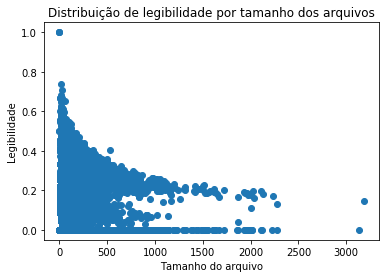

In [ ]:
# Com todos os arquivos

df_dist = df_words[['Quantidade total de palavras', 'Porcentagem']]
df_dist['Porcentagem'] = df_dist['Porcentagem'].apply(lambda x: x/100)

plt.plot(df_dist['Quantidade total de palavras'], df_dist['Porcentagem'], 'o')
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Legibilidade')
plt.title('Distribuição de legibilidade por tamanho dos arquivos')

In [ ]:
df_dist.shape

(55318, 2)

Text(0.5, 1.0, 'Distribuição de legibilidade por tamanho dos arquivos')

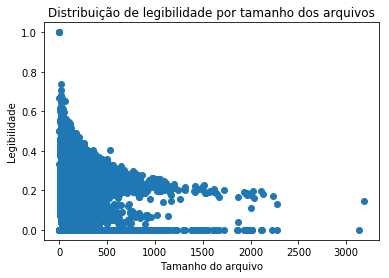

In [ ]:
# Retirando arquivos com nehuma palavra legível

df_dist = df_words[['Quantidade total de palavras', 'Porcentagem']]
df_dist = df_dist[df_dist['Quantidade total de palavras'] > 0]
df_dist['Porcentagem'] = df_dist['Porcentagem'].apply(lambda x: x/100)

plt.plot(df_dist['Quantidade total de palavras'], df_dist['Porcentagem'], 'o')
plt.xlabel('Tamanho do arquivo')
plt.ylabel('Legibilidade')
plt.title('Distribuição de legibilidade por tamanho dos arquivos')

### Métricas: total de palavras, total de palavras únicas

In [ ]:
array = []
for index, row in df_words.iterrows():
    array.append(row['Palavras'])
    data = ' '.join(array)

In [ ]:
total_palavras = len(data.split())
total_palavras_unicas = len(set(data.split()))

print(f'Total de palavras: {total_palavras}')
print(f'Total de palavras únicas: {total_palavras_unicas}')

Total de palavras: 795160
Total de palavras únicas: 19438


#### Histogramas de quantidade de palavras totais e legíveis

Text(0.5, 1.0, 'Histograma dos 2000 arquivos com mais palavras')

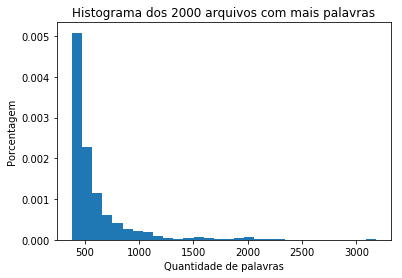

In [ ]:
df_order_total_palavras  = df_words.sort_values(by = ['Quantidade total de palavras'], ascending=False)

plt.hist(df_order_total_palavras['Quantidade total de palavras'].head(2000), density=True, bins=30)  # density=False would make counts
plt.ylabel('Porcentagem')
plt.xlabel('Quantidade de palavras')
plt.title('Histograma dos 2000 arquivos com mais palavras')

Text(0.5, 1.0, 'Histograma dos 2000 arquivos com mais palavras legíveis')

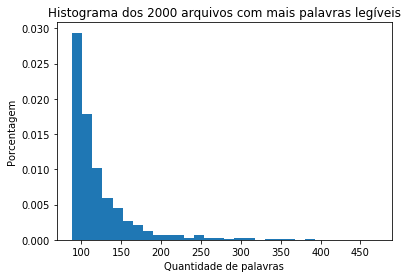

In [ ]:
df_order_palavras_legiveis  = df_words.sort_values(by = ['Quantidade de palavras legíveis'], ascending=False)

plt.hist(df_order_palavras_legiveis['Quantidade de palavras legíveis'].head(2000), density=True, bins=30)  # density=False would make counts
plt.ylabel('Porcentagem')
plt.xlabel('Quantidade de palavras')
plt.title('Histograma dos 2000 arquivos com mais palavras legíveis')

### Verificação diferença entre legíveis e não legíveis

In [ ]:
Quantidade_arquivos = 50

df_dif = df_words[['Quantidade total de palavras', 'Quantidade de palavras legíveis']]
df_dif = df_dif.sort_values(by = ['Quantidade de palavras legíveis'], ascending=False).head(Quantidade_arquivos)

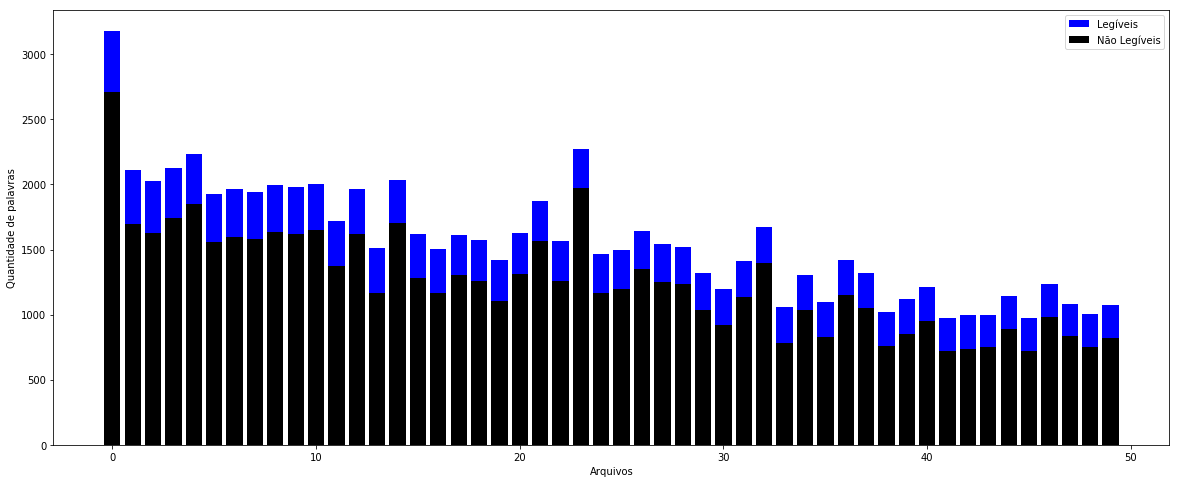

<Figure size 1872x720 with 0 Axes>

In [ ]:
figure(figsize=(20, 8))

for index, row in df_dif.reset_index().iterrows():
    plt.bar(index,row['Quantidade de palavras legíveis'], bottom =  row['Quantidade total de palavras'] -  row['Quantidade de palavras legíveis'], color='blue')
    plt.bar(index, row['Quantidade total de palavras'] -  row['Quantidade de palavras legíveis'], color='black')
    
plt.xlabel('Arquivos')
plt.ylabel('Quantidade de palavras')
plt.legend(labels = ['Legíveis','Não Legíveis'])
plt.figure(figsize=(26,10))
plt.show()